# Pandas 基础

## Series：带索引的数组

In [5]:
import pandas as pd

obj = pd.Series([1, -2, 3, -4])
obj

0    1
1   -2
2    3
3   -4
dtype: int64

给 `Series` 添加索引。

In [6]:
obj2 = pd.Series([1, -2, 3, -4], index=['a', 'b', 'c', 'd'])
obj2

a    1
b   -2
c    3
d   -4
dtype: int64

In [7]:
# 有索引，就可以通过索引获取元素了
obj2['a'], obj2['c']

(1, 3)

常用：获得 Series 中的数据。

In [8]:
obj2.values

array([ 1, -2,  3, -4])

常用：获得 Series 中的索引。

In [9]:
obj2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [10]:
obj2['b']

-2

**Series 切片得到视图，如果没有索引，我们只能通过下标**。

In [11]:
obj2['c'] = 23
obj2[['c', 'd']]

c    23
d    -4
dtype: int64

In [12]:
obj2

a     1
b    -2
c    23
d    -4
dtype: int64

### 常用：下面这个方法可以筛选数据

In [13]:
obj2[obj2 < 0]

b   -2
d   -4
dtype: int64

In [14]:
obj2 * 2

a     2
b    -4
c    46
d    -8
dtype: int64

In [15]:
import numpy as np

np.abs(obj2)

a     1
b     2
c    23
d     4
dtype: int64

In [16]:
data = {
    '张三': 92,
    '李四': 78,
    '王五': 68,
    '小明': 82
}

In [17]:
obj3 = pd.Series(data)
obj3

张三    92
李四    78
王五    68
小明    82
dtype: int64

In [18]:
obj3.index

Index(['张三', '李四', '王五', '小明'], dtype='object')

In [19]:
obj3.values

array([92, 78, 68, 82])

In [20]:
names = ['张三', '李四', '王五', '小明']
obj4 = pd.Series(data, index=names)
obj4

张三    92
李四    78
王五    68
小明    82
dtype: int64

### 还可以给 index 设置一个 name

In [21]:
obj4.name = 'math'
obj4.index.name = 'students'

In [22]:
obj4

students
张三    92
李四    78
王五    68
小明    82
Name: math, dtype: int64

## DataFrame：多个 Series 组成 DataFrame

In [23]:
import numpy as np
import pandas as pd

In [24]:
data = {
    'name': ['张三', '李四', '王五', '小明'],
    'sex': ['female', 'female', 'male', 'male'],
    'year': [2001, 2001, 2003, 2002],
    'city': ['北京', '上海', '广州', '北京']
}
df = pd.DataFrame(data)
df

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京


In [25]:
df = pd.DataFrame(data, columns=['name', 'sex', 'year', 'city'])
df

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京


In [26]:
df = pd.DataFrame(data, columns=['name', 'sex', 'year',
                              'city'], index=['a', 'b', 'c', 'd'])
df

,name,sex,year,city
a,张三,female,2001,北京
b,李四,female,2001,上海
c,王五,male,2003,广州
d,小明,male,2002,北京


In [27]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [28]:
df.columns

Index(['name', 'sex', 'year', 'city'], dtype='object')

如果传入的是 dict，dict 的 key 作为字段名。

In [29]:
data2 = {
    'sex': {'张三': 'female', '李四': 'female', '王五': 'male'},
    'city': {'张三': '北京', '李四': '上海', '王五': '广州'}
}
df2 = pd.DataFrame(data2)
df2

,sex,city
张三,female,北京
李四,female,上海
王五,male,广州


## DataFrame 的字段和索引都是可以命名的，有 name 属性

In [30]:
df.index.name = '唯一标识'
df.columns.name = '学生信息'

In [31]:
df

学生信息,name,sex,year,city
唯一标识,,,,
a,张三,female,2001,北京
b,李四,female,2001,上海
c,王五,male,2003,广州
d,小明,male,2002,北京


In [32]:
obj = pd.Series([1, -2, 3, -4], index=['a', 'b', 'c', 'd'])
obj

a    1
b   -2
c    3
d   -4
dtype: int64

In [33]:
obj.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [34]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object', name='唯一标识')

In [35]:
df.columns

Index(['name', 'sex', 'year', 'city'], dtype='object', name='学生信息')

In [36]:
obj

a    1
b   -2
c    3
d   -4
dtype: int64

In [37]:
index = obj.index
index

Index(['a', 'b', 'c', 'd'], dtype='object')

## 索引不支持单独修改

In [38]:
index[1] = 'f'

TypeError: Index does not support mutable operations

In [39]:
index = obj.index
index[1] = 'f'

TypeError: Index does not support mutable operations

In [40]:
df

学生信息,name,sex,year,city
唯一标识,,,,
a,张三,female,2001,北京
b,李四,female,2001,上海
c,王五,male,2003,广州
d,小明,male,2002,北京


In [41]:
'sex' in df.columns

True

In [42]:
'f' in df.index

False

## 重新设置索引 reindex（其实就是重新给索引排序）

In [47]:
obj = pd.Series([1, -2, 3, -4], index=['b', 'a', 'c', 'd'])
obj

b    1
a   -2
c    3
d   -4
dtype: int64

In [48]:
obj2 = obj.reindex(['a', 'b', 'b', 'b', 'b', 'b', 'c', 'd', 'e'])
obj2

a   -2.0
b    1.0
b    1.0
b    1.0
b    1.0
b    1.0
c    3.0
d   -4.0
e    NaN
dtype: float64

## reindex 的时候可以补全数据，索引补全，value 的指定使用 method='ffill' ，即按照前一个

In [57]:
obj = pd.Series([1, -2, 3, -4], index=[0, 2, 3, 5])
obj

0    1
2   -2
3    3
5   -4
dtype: int64

In [58]:
obj2 = obj.reindex(range(6), method='ffill')
obj2

0    1
1    1
2   -2
3    3
4    3
5   -4
dtype: int64

## reindex 方法

In [61]:
df = pd.DataFrame(np.arange(9).reshape(3, 3),
                  index=['a', 'c', 'd'],
                  columns=['name', 'id', 'sex'])
df

,name,id,sex
a,0,1,2
c,3,4,5
d,6,7,8


### 如果不指定补全策略 method='ffill' ，则填充的数据为 null

In [41]:
df2 = df.reindex(['a', 'b', 'c', 'd'])
df2

,name,id,sex
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [31]:
# 还可以重新对列进行排序
df3 = df.reindex(columns=['name', 'year', 'id'], fill_value=0)
df3

,name,year,id
a,0,0,1
c,3,0,4
d,6,0,7


In [63]:
data = {
    'name': ['张三', '李四', '王五', '小明'],
    'grade': [68, 78, 63, 92]
}
df = pd.DataFrame(data)
df

,name,grade
0,张三,68
1,李四,78
2,王五,63
3,小明,92


In [64]:
df2 = df.sort_values(by='grade')
df2

,name,grade
2,王五,63
0,张三,68
1,李四,78
3,小明,92


## index 成为了一列数据

In [67]:
df3 = df2.reset_index()
df3

,index,name,grade
0,2,王五,63
1,0,张三,68
2,1,李四,78
3,3,小明,92


In [68]:
# 还可以一直 reset 下去，但是其实这样做没有多大意义
df3.reset_index()

,level_0,index,name,grade
0,0,2,王五,63
1,1,0,张三,68
2,2,1,李四,78
3,3,3,小明,92


In [70]:
# 在 reset_index 额时候可以指定删除
df4 = df2.reset_index(drop=True)
df4

,name,grade
0,王五,63
1,张三,68
2,李四,78
3,小明,92


In [71]:
data = {
    'name': ['张三', '李四', '王五', '小明'],
    'sex': ['female', 'female', 'male', 'male'],
    'year': [2001, 2001, 2003, 2002],
    'city': ['北京', '上海', '广州', '北京']
}
df = pd.DataFrame(data)
df

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京


## （重要）set_index 把其中的一列设置为索引

In [72]:
df2 = df.set_index('name')
df2

,sex,year,city
name,,,
张三,female,2001,北京
李四,female,2001,上海
王五,male,2003,广州
小明,male,2002,北京


In [74]:
# 这个 name 就是原来的 column 名字
df2.index.name

'name'

## reset_index 把索引恢复成数字

In [76]:
# 把 index 变成了一列属性，而 index 就默认变成了数值型
df3 = df2.reset_index()
df3

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京


# 索引和选取

In [78]:
import numpy as np
import pandas as pd

obj = pd.Series([1, -2, 3, -4], index=['a', 'b', 'c', 'd'])
obj

a    1
b   -2
c    3
d   -4
dtype: int64

In [80]:
# 可以用数字
obj[1]

-2

In [81]:
obj.iloc[1]

-2

In [82]:
# 也可以用索引
obj['b']

-2

In [6]:
obj[['a', 'c']]

a    1
c    3
dtype: int64

In [84]:
# 不包括尾巴
obj[0:3] 

a    1
b   -2
c    3
dtype: int64

In [86]:
# 使用索引切片是包含尾巴结点的
obj['a':'c']

a    1
b   -2
c    3
dtype: int64

## 下面来看  DataFrame

In [88]:
data = {
    'name': ['张三', '李四', '王五', '小明'],
    'sex': ['female', 'female', 'male', 'male'],
    'year': [2001, 2001, 2003, 2002],
    'city': ['北京', '上海', '广州', '北京']
}
df = pd.DataFrame(data)
df

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京


In [90]:
# 默认是取列，如果你要取一行，那就要用 loc 函数了 df2.loc[['张三']]
df['city']

0    北京
1    上海
2    广州
3    北京
Name: city, dtype: object

In [91]:
df.name

0    张三
1    李四
2    王五
3    小明
Name: name, dtype: object

In [92]:
df[['city', 'sex']]

,city,sex
0,北京,female
1,上海,female
2,广州,male
3,北京,male


In [94]:
# 把其中一列设置成 index
df2 = df.set_index('name')
df2

,sex,year,city
name,,,
张三,female,2001,北京
李四,female,2001,上海
王五,male,2003,广州
小明,male,2002,北京


In [103]:
df2.loc['张三']

sex     female
year      2001
city        北京
Name: 张三, dtype: object

In [102]:
df2.loc[['张三']]

,sex,year,city
name,,,
张三,female,2001,北京


In [105]:
type(df2.loc['张三']), type(df2.loc[['张三']])

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [106]:
# 如果是数字，还是索引切片
df2[0:2]

,sex,year,city
name,,,
张三,female,2001,北京
李四,female,2001,上海


### 设置了索引以后，就可以使用索引中的文字来索引到数据了

In [108]:
df2['张三':'王五']

,sex,year,city
name,,,
张三,female,2001,北京
李四,female,2001,上海
王五,male,2003,广州


In [109]:
df2

,sex,year,city
name,,,
张三,female,2001,北京
李四,female,2001,上海
王五,male,2003,广州
小明,male,2002,北京


## 常用：按照行索引数据（可以输入索引）

In [110]:
df2.loc['张三']

sex     female
year      2001
city        北京
Name: 张三, dtype: object

In [111]:
df2.loc['张三']

sex     female
year      2001
city        北京
Name: 张三, dtype: object

In [112]:
df2.loc[['张三', '王五']]

,sex,year,city
name,,,
张三,female,2001,北京
王五,male,2003,广州


## 按照行索引数据，输入的是数字

In [116]:
# 使用数字切片是针对 index 的
df2[0:1]

,sex,year,city
name,,,
张三,female,2001,北京


In [117]:
df2.iloc[1]

sex     female
year      2001
city        上海
Name: 李四, dtype: object

In [118]:
df2.iloc[[1, 3]]

,sex,year,city
name,,,
李四,female,2001,上海
小明,male,2002,北京


## 这种混合索引已经不推荐使用了

In [120]:
df2.ix[['张三', '王五'], 0:2]

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,sex,year
name,,
张三,female,2001
王五,male,2003


In [124]:

# 如果尝试使用链接分配，则引发异常，警告或无操作，默认值为warn

# 这个设置会关闭掉 copywarning，也有人提问到关闭这个 warning 过后，速度更快，有待验证
pd.set_option('mode.chained_assignment', None)

In [125]:
df2.ix[:, ['sex', 'year']]  # 获取列

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,sex,year
name,,
张三,female,2001
李四,female,2001
王五,male,2003
小明,male,2002


In [126]:
df2.ix[[1, 3], :]  # 获取行

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,sex,year,city
name,,,
李四,female,2001,上海
小明,male,2002,北京


In [127]:
df2['sex'] == 'female'

name
张三     True
李四     True
王五    False
小明    False
Name: sex, dtype: bool

In [128]:
df2[df2['sex'] == 'female']

,sex,year,city
name,,,
张三,female,2001,北京
李四,female,2001,上海


In [133]:
df2['sex'] == 'female'

name
张三     True
李四     True
王五    False
小明    False
Name: sex, dtype: bool

In [135]:
df2['city'] == '北京'

name
张三     True
李四    False
王五    False
小明     True
Name: city, dtype: bool

In [136]:
(df2['sex'] == 'female') & (df2['city'] == '北京')

name
张三     True
李四    False
王五    False
小明    False
dtype: bool

In [131]:
df2[(df2['sex'] == 'female') & (df2['city'] == '北京')]

,sex,year,city
name,,,
张三,female,2001,北京


# 行和列的操作

In [137]:
df

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京


In [138]:
new_data = {
    'city': '武汉',
    'name': '小李',
    'sex': 'male',
    'year': 2002
}

In [139]:
df = df.append(new_data, ignore_index=True)  # 忽略索引值
df

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京
4,小李,male,2002,武汉


In [140]:
df['class'] = 2018
df

,name,sex,year,city,class
0,张三,female,2001,北京,2018
1,李四,female,2001,上海,2018
2,王五,male,2003,广州,2018
3,小明,male,2002,北京,2018
4,小李,male,2002,武汉,2018


In [141]:
df['math'] = [92, 78, 58, 69, 82]
df

,name,sex,year,city,class,math
0,张三,female,2001,北京,2018,92
1,李四,female,2001,上海,2018,78
2,王五,male,2003,广州,2018,58
3,小明,male,2002,北京,2018,69
4,小李,male,2002,武汉,2018,82


## 删除行与删除列

In [142]:
# 默认是删除行
new_df = df.drop(2)  
new_df

,name,sex,year,city,class,math
0,张三,female,2001,北京,2018,92
1,李四,female,2001,上海,2018,78
3,小明,male,2002,北京,2018,69
4,小李,male,2002,武汉,2018,82


In [143]:
# 设置 axis=1 删除列
new_df = new_df.drop('class', axis=1)  
new_df

,name,sex,year,city,math
0,张三,female,2001,北京,92
1,李四,female,2001,上海,78
3,小明,male,2002,北京,69
4,小李,male,2002,武汉,82


## rename 可以把 index 和 columns 一起修改

In [144]:
new_df.rename(index={3: 2, 4: 3}, columns={'math': 'Math'},
              inplace=True)  # inplace可在原数据上修改
new_df

,name,sex,year,city,Math
0,张三,female,2001,北京,92
1,李四,female,2001,上海,78
2,小明,male,2002,北京,69
3,小李,male,2002,武汉,82


In [146]:
obj1 = pd.Series([3.2, 5.3, -4.4, -3.7], index=['a', 'c', 'g', 'f'])
obj1

a    3.2
c    5.3
g   -4.4
f   -3.7
dtype: float64

In [147]:
obj2 = pd.Series([5.0, -2, 4.4, 3.4], index=['a', 'b', 'c', 'd'])
obj2

a    5.0
b   -2.0
c    4.4
d    3.4
dtype: float64

In [148]:
obj1 + obj2

a    8.2
b    NaN
c    9.7
d    NaN
f    NaN
g    NaN
dtype: float64

In [150]:
df1 = pd.DataFrame(np.arange(9).reshape(3, 3), columns=[
                'a', 'b', 'c'], index=['apple', 'tea', 'banana'])
df1

,a,b,c
apple,0,1,2
tea,3,4,5
banana,6,7,8


In [151]:
df2 = pd.DataFrame(np.arange(9).reshape(3, 3), columns=[
                'a', 'b', 'd'], index=['apple', 'tea', 'coco'])
df2

,a,b,d
apple,0,1,2
tea,3,4,5
coco,6,7,8


In [152]:
df1 + df2

,a,b,c,d
apple,0.0,2.0,NaN,NaN
banana,NaN,NaN,NaN,NaN
coco,NaN,NaN,NaN,NaN
tea,6.0,8.0,NaN,NaN


In [153]:
df1

,a,b,c
apple,0,1,2
tea,3,4,5
banana,6,7,8


In [156]:
s = df1.loc['apple']
s

a    0
b    1
c    2
Name: apple, dtype: int64

In [154]:
s = df1.ix['apple']
s

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


a    0
b    1
c    2
Name: apple, dtype: int64

In [158]:
# 这里有广播操作
df1 - s

,a,b,c
apple,0,0,0
tea,3,3,3
banana,6,6,6


In [164]:
data = {
    'fruit': ['apple', 'orange', 'grape', 'banana'],
    'price': ['25元', '42元', '35元', '14元']
}
df1 = pd.DataFrame(data)
df1

,fruit,price
0,apple,25元
1,orange,42元
2,grape,35元
3,banana,14元


In [165]:
def f(x):
    print(x)
    return x.split('元')[0]


df1['price'] = df1['price'].map(f)
df1

25元
42元
35元
14元


,fruit,price
0,apple,25
1,orange,42
2,grape,35
3,banana,14


In [166]:
df2 = pd.DataFrame(np.random.randn(3, 3), columns=[
                'a', 'b', 'c'], index=['app', 'win', 'mac'])
df2

,a,b,c
app,-1.968086,-1.677267,-0.556158
win,1.336091,1.507252,1.438285
mac,0.550920,0.979616,-0.004479


## apply 针对每一列进行汇总计算

In [169]:
def f(x): 
    print(x,end='\n\n')
    return x.max() - x.min()


result = df2.apply(f)

app   -1.968086
win    1.336091
mac    0.550920
Name: a, dtype: float64

app   -1.677267
win    1.507252
mac    0.979616
Name: b, dtype: float64

app   -0.556158
win    1.438285
mac   -0.004479
Name: c, dtype: float64



In [170]:
print(result)

a    3.304177
b    3.184518
c    1.994443
dtype: float64


In [171]:
print(type(result))

<class 'pandas.core.series.Series'>


In [177]:
def f(x):
    return x.sum()


result = df2.apply(f)
print(result)

a   -0.081076
b    0.809600
c    0.877649
dtype: float64


In [178]:
df2.apply(sum)

a   -0.081076
b    0.809600
c    0.877649
dtype: float64

In [179]:
df2.apply('sum')

a   -0.081076
b    0.809600
c    0.877649
dtype: float64

In [82]:
df2

,a,b,c
app,1.507962,-2.140018,0.053571
win,0.729671,0.207060,0.397773
mac,-0.191497,-0.765726,-0.266327


# applymap 针对每一个元素操作

In [180]:
df2.applymap(lambda x: '%.2f' % x)

,a,b,c
app,-1.97,-1.68,-0.56
win,1.34,1.51,1.44
mac,0.55,0.98,-0.00


In [183]:
df2.applymap(lambda x: str(x) + " 测试字符串连接")

,a,b,c
app,-1.968086291360448 测试字符串连接,-1.6772669377619476 测试字符串连接,-0.5561580352483977 测试字符串连接
win,1.3360907493025431 测试字符串连接,1.507251522502209 测试字符串连接,1.43828546435187 测试字符串连接
mac,0.5509198894038059 测试字符串连接,0.9796159082411904 测试字符串连接,-0.004478706513065146 测试字符串连接


In [86]:
obj1 = Series([-2, 3, 2, 1], index=['b', 'a', 'd', 'c'])
obj1

b   -2
a    3
d    2
c    1
dtype: int64

## 不仅可以对 index 还是对 values 进行排序，针对 values 排序的时候指定的字段放在 by 里面

In [87]:
obj1.sort_index()  # 升序

a    3
b   -2
c    1
d    2
dtype: int64

In [88]:
obj1.sort_index(ascending=False)  # 降序

d    2
c    1
b   -2
a    3
dtype: int64

In [91]:
obj1.sort_values()

b   -2
c    1
d    2
a    3
dtype: int64

In [92]:
df2

,a,b,c
app,1.507962,-2.140018,0.053571
win,0.729671,0.207060,0.397773
mac,-0.191497,-0.765726,-0.266327


In [93]:
df2.sort_values(by='b')

,a,b,c
app,1.507962,-2.140018,0.053571
mac,-0.191497,-0.765726,-0.266327
win,0.729671,0.207060,0.397773


In [184]:
df = pd.DataFrame(np.random.randn(9).reshape(3, 3), columns=['a', 'b', 'c'])
df

,a,b,c
0,-0.421393,1.096342,-0.769880
1,-0.064974,-1.000576,0.928706
2,-0.573724,-0.841827,-1.580047


In [186]:
df.sum()

a   -1.060091
b   -0.746061
c   -1.421221
dtype: float64

In [188]:
df.sum(axis=0)

a   -1.060091
b   -0.746061
c   -1.421221
dtype: float64

In [187]:
df.sum(axis=1)

0   -0.094931
1   -0.136844
2   -2.995598
dtype: float64

In [190]:
data = {
    'name': ['张三', '李四', '王五', '小明'],
    'sex': ['female', 'female', 'male', 'male'],
    'math': [78, 79, 83, 92],
    'city': ['北京', '上海', '广州', '北京']
}
df = pd.DataFrame(data)
df

,name,sex,math,city
0,张三,female,78,北京
1,李四,female,79,上海
2,王五,male,83,广州
3,小明,male,92,北京


In [191]:
df.describe()

,math
count,4.000000
mean,83.000000
std,6.377042
min,78.000000
25%,78.750000
50%,81.000000
75%,85.250000
max,92.000000


In [193]:
obj = pd.Series(['a', 'b', 'a', 'c', 'b'])
obj

0    a
1    b
2    a
3    c
4    b
dtype: object

In [194]:
obj.unique()

array(['a', 'b', 'c'], dtype=object)

## value_counts() 是很常用的

In [195]:
obj.value_counts()

a    2
b    2
c    1
dtype: int64

## Series 的复合索引

In [197]:
obj = pd.Series(np.random.randn(9),
             index=[['one', 'one', 'one', 'two', 'two', 'two', 'three', 'three', 'three'],
                    ['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c']])
obj

one    a   -0.262352
       b    0.443198
       c    0.007121
two    a    1.863202
       b   -0.481021
       c    1.358823
three  a    0.676355
       b    1.667280
       c    0.337264
dtype: float64

In [198]:
obj.index

MultiIndex(levels=[['one', 'three', 'two'], ['a', 'b', 'c']],
           labels=[[0, 0, 0, 2, 2, 2, 1, 1, 1], [0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [199]:
obj['two']

a    1.863202
b   -0.481021
c    1.358823
dtype: float64

In [200]:
obj[:, 'a']  # 内层选取

one     -0.262352
two      1.863202
three    0.676355
dtype: float64

## DataFrame 的复合索引

In [209]:
df = pd.DataFrame(np.arange(16).reshape(4, 4),
               index=[['one', 'one', 'two', 'two'], ['a', 'b', 'a', 'b']],
               columns=[['apple', 'apple', 'orange', 'orange'], ['red', 'green', 'red', 'green']])
df

apple       orange      
        red green    red green
one a     0     1      2     3
    b     4     5      6     7
two a     8     9     10    11
    b    12    13     14    15

In [204]:
df['apple']

red  green
one a    0      1
    b    4      5
two a    8      9
    b   12     13

In [205]:
df.swaplevel(0, 1)

apple       orange      
        red green    red green
a one     0     1      2     3
b one     4     5      6     7
a two     8     9     10    11
b two    12    13     14    15

In [213]:
df.sum(level=0, axis=0)

apple       orange      
      red green    red green
one     4     6      8    10
two    20    22     24    26

In [210]:
df.sum(level=0)

apple       orange      
      red green    red green
one     4     6      8    10
two    20    22     24    26

In [214]:
df.sum(level=1, axis=0)

apple       orange      
    red green    red green
a     8    10     12    14
b    16    18     20    22

In [212]:
df.sum(level=1, axis=1)

red  green
one a    2      4
    b   10     12
two a   18     20
    b   26     28

# Pandas 数据可视化（比较重要）

In [207]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt  # 导入matplotlib库
# 魔法函数
%matplotlib inline  

In [223]:
s = pd.Series(np.random.normal(size=10))
s

0    0.376260
1   -1.661741
2   -0.084010
3   -1.165962
4    0.664082
5   -0.522883
6   -0.446051
7   -1.136114
8    0.692035
9   -1.051314
dtype: float64

## 描点连线，plot 默认就是折线图

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


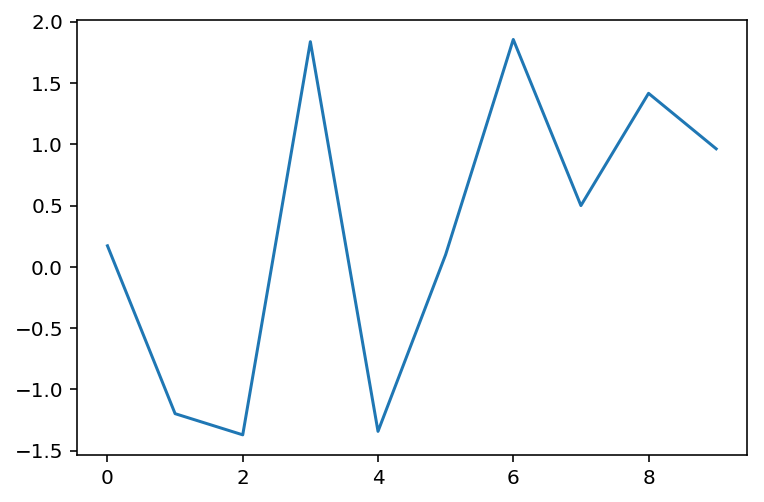

In [216]:
s.plot()

In [224]:
df = pd.DataFrame({'normal': np.random.normal(size=100),
                   'gamma': np.random.gamma(1, size=100),
                   'poisson': np.random.poisson(size=100)})
df.cumsum()

,normal,gamma,poisson
0,-0.159255,0.396059,1.0
1,1.133131,1.646955,1.0
2,-0.987856,3.032287,1.0
3,-2.215803,5.686238,1.0
4,-2.929392,8.025568,1.0
5,-2.908490,9.908636,2.0
6,-3.253574,10.576505,2.0
7,-4.746903,11.044658,3.0
8,-5.754777,11.964499,5.0
9,-5.512102,13.322851,6.0


## 根据累计值，描点连线

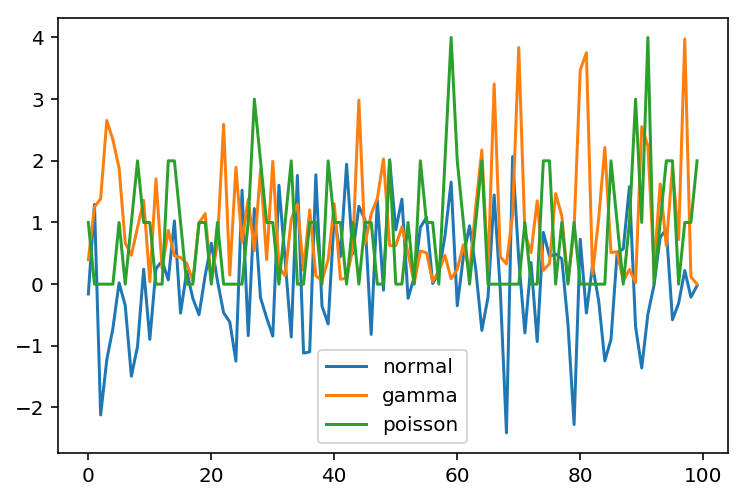

In [225]:
df.plot()

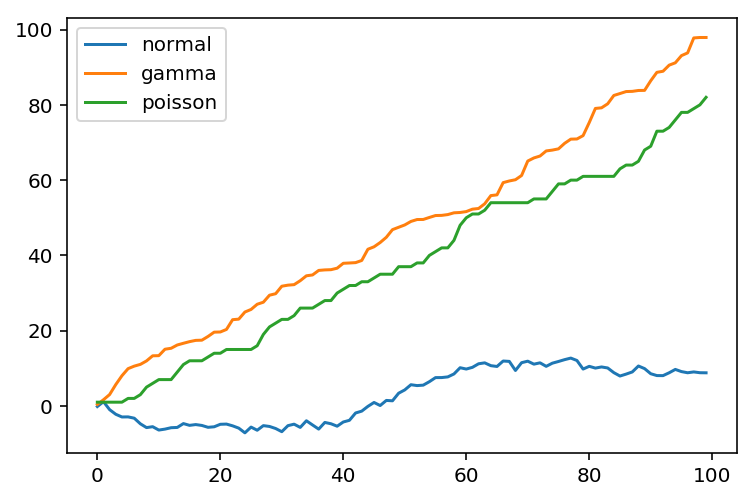

In [226]:
df.cumsum().plot()

In [227]:
data = {
    'name': ['张三', '李四', '王五', '小明', 'Peter'],
    'sex': ['female', 'female', 'male', 'male', 'male'],
    'year': [2001, 2001, 2003, 2002, 2002],
    'city': ['北京', '上海', '广州', '北京', '北京']
}
df = pd.DataFrame(data)
df

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京
4,Peter,male,2002,北京


In [228]:
# 离散型变量可以数数字
df['sex'].value_counts()

male      3
female    2
Name: sex, dtype: int64

## 绘制条形图（柱状图，主要是数值型都可以绘制出来）

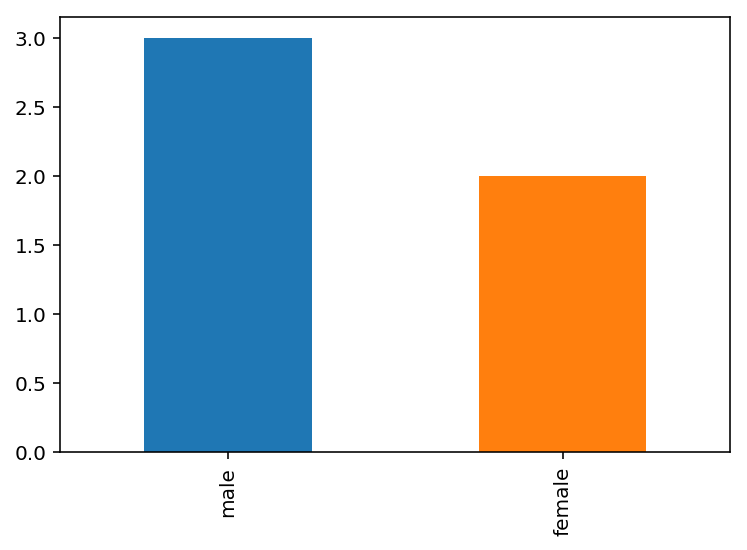

In [230]:
df['sex'].value_counts().plot(kind='bar')

In [231]:
df2 = pd.DataFrame(np.random.randint(0, 100, size=(3, 3)),
                index=('one', 'two', 'three'),
                columns=['A', 'B', 'C'])
df2

,A,B,C
one,18,27,94
two,89,43,18
three,11,42,46


## 绘制多类别水平的条形图

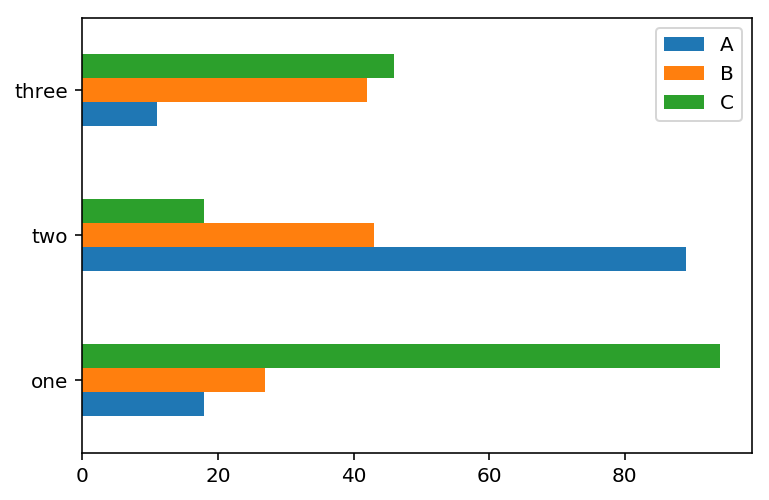

In [235]:
df2.plot(kind='barh')

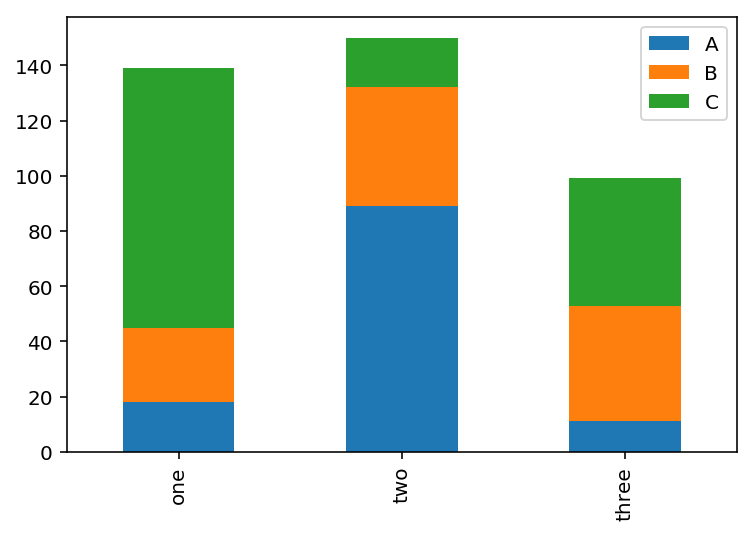

In [238]:
df2.plot(kind='bar', stacked=True)

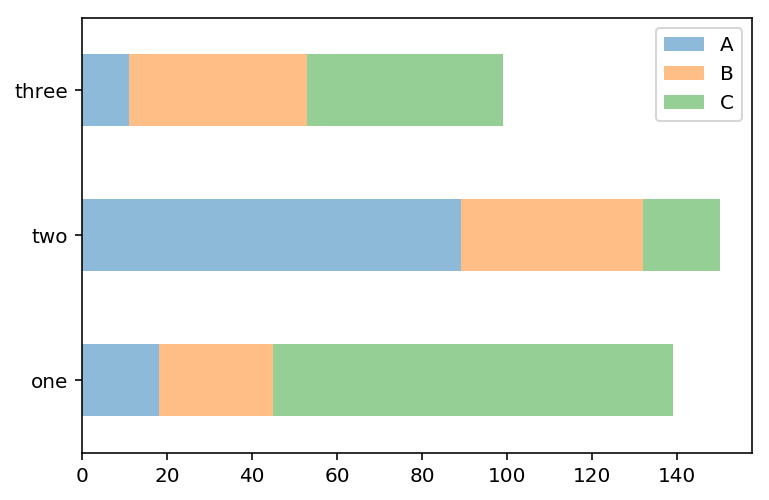

In [234]:
df2.plot(kind='barh', stacked=True, alpha=0.5)

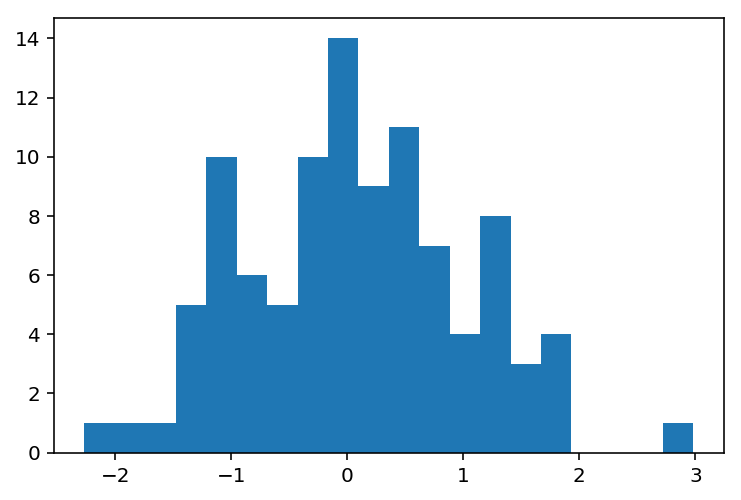

In [239]:
s = pd.Series(np.random.normal(size=100))
s.hist(bins=20, grid=False)

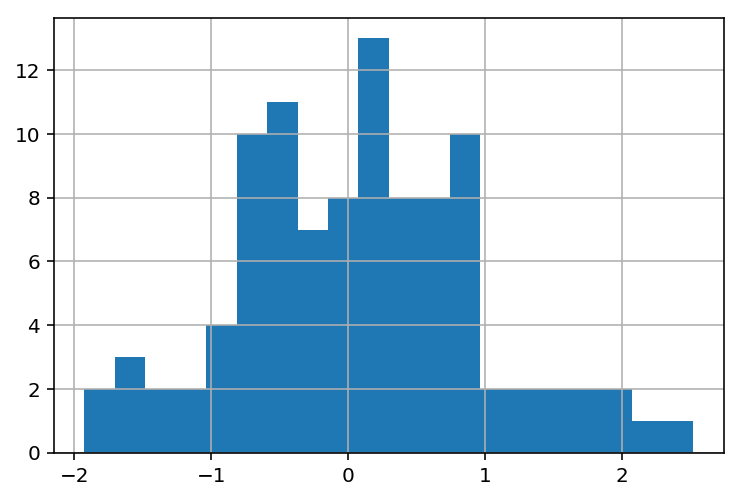

In [240]:
s = pd.Series(np.random.normal(size=100))
s.hist(bins=20, grid=True)

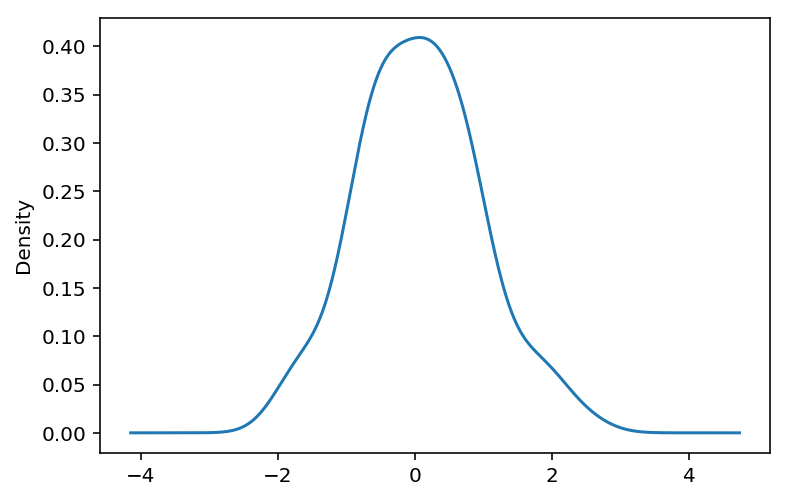

In [241]:
s.plot(kind='kde')

In [242]:
df3 = pd.DataFrame(np.arange(10), columns=['X'])
df3['Y'] = 2 * df3['X'] + 5
df3

,X,Y
0,0,5
1,1,7
2,2,9
3,3,11
4,4,13
5,5,15
6,6,17
7,7,19
8,8,21
9,9,23


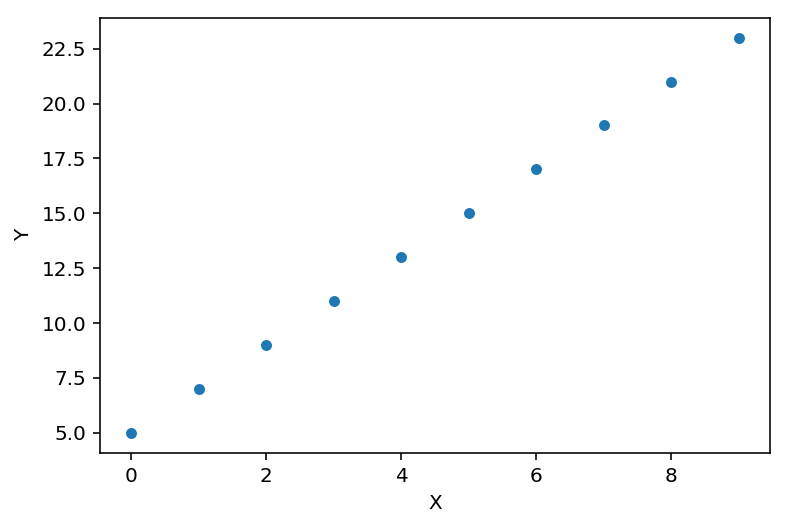

In [243]:
df3.plot(kind='scatter', x='X', y='Y')

In [244]:
import numpy as np
import pandas as pd
import seaborn as sns  # 导入seaborn库

In [245]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [246]:
tips.shape

(244, 7)

In [247]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [248]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


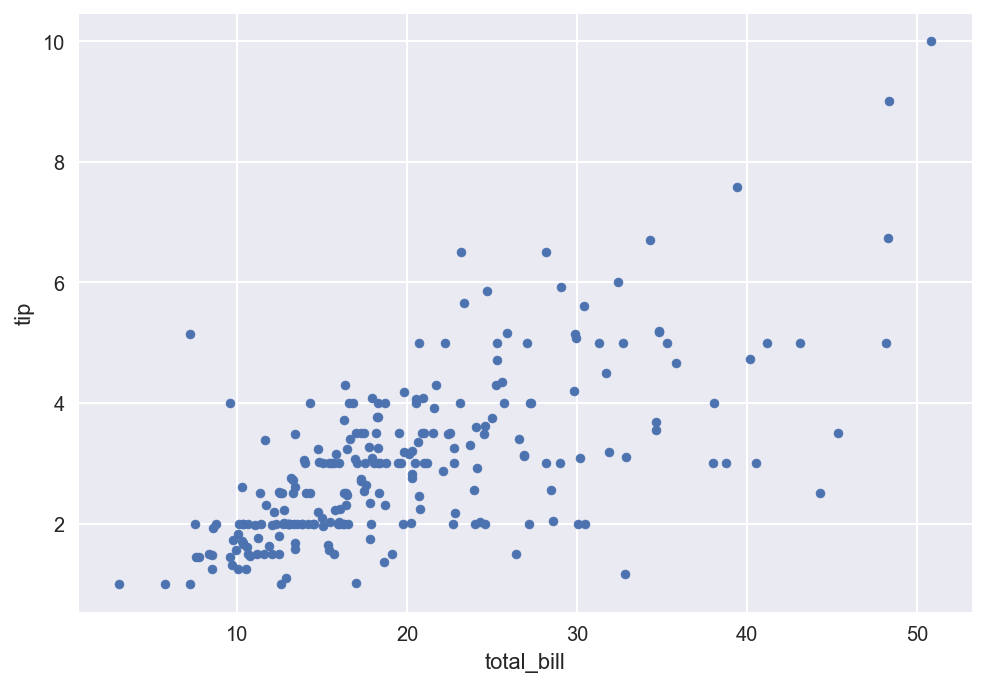

In [249]:
tips.plot(kind='scatter', x='total_bill', y='tip')

In [250]:
male_tip = tips[tips['sex'] == 'Male']['tip'].mean()
male_tip

3.0896178343949043

In [252]:
female_tip = tips[tips['sex'] == 'Female']['tip'].mean()
female_tip

2.8334482758620685

In [253]:
s = pd.Series([male_tip, female_tip], index=['male', 'female'])
s

male      3.089618
female    2.833448
dtype: float64

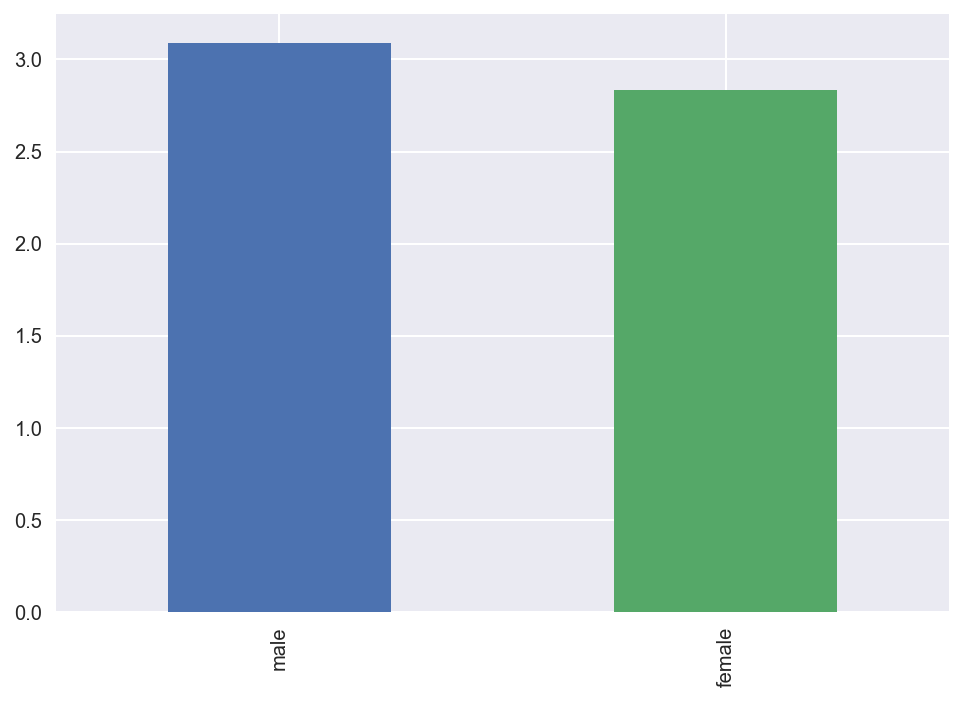

In [254]:
s.plot(kind='bar')
plt.show()

In [255]:
tips['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [256]:
sun_tip = tips[tips['day'] == 'Sun']['tip'].mean()
sat_tip = tips[tips['day'] == 'Sat']['tip'].mean()
thur_tip = tips[tips['day'] == 'Thur']['tip'].mean()
fri_tip = tips[tips['day'] == 'Fri']['tip'].mean()

In [257]:
s = pd.Series([thur_tip, fri_tip, sat_tip, sun_tip],
           index=['Thur', 'Fri', 'Sat', 'Sun'])
s

Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
dtype: float64

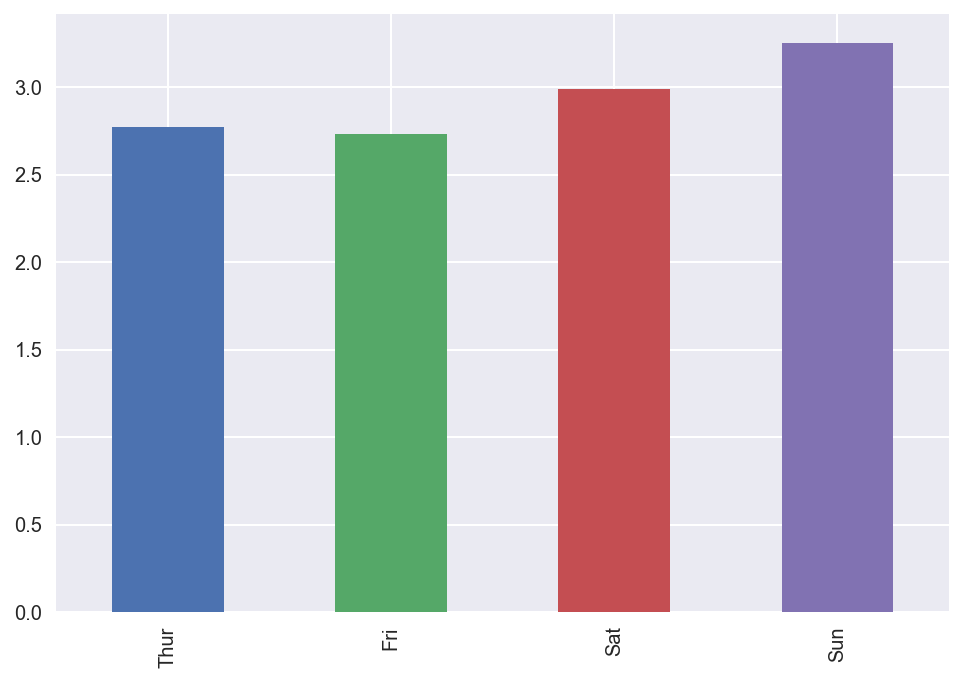

In [258]:
s.plot(kind='bar')

In [259]:
tips['percent_tip'] = tips['tip'] / (tips['total_bill'] + tips['tip'])
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.056111
1,10.34,1.66,Male,No,Sun,Dinner,3,0.138333
2,21.01,3.50,Male,No,Sun,Dinner,3,0.142799
3,23.68,3.31,Male,No,Sun,Dinner,2,0.122638
4,24.59,3.61,Female,No,Sun,Dinner,4,0.128014
5,25.29,4.71,Male,No,Sun,Dinner,4,0.157000
6,8.77,2.00,Male,No,Sun,Dinner,2,0.185701
7,26.88,3.12,Male,No,Sun,Dinner,4,0.104000
8,15.04,1.96,Male,No,Sun,Dinner,2,0.115294
9,14.78,3.23,Male,No,Sun,Dinner,2,0.179345


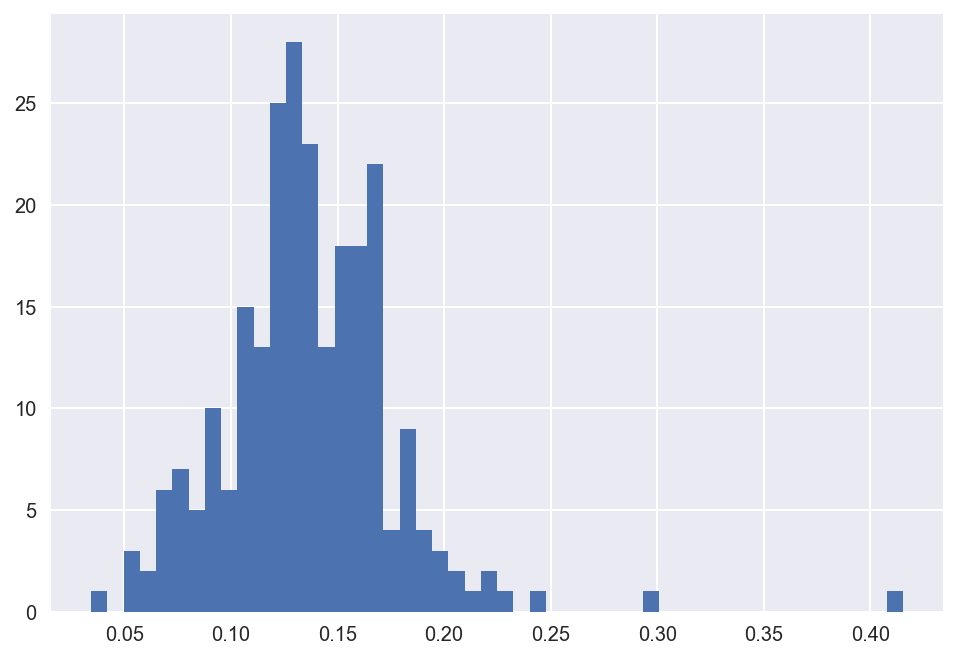

In [260]:
tips['percent_tip'].hist(bins=50)